In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense
import numpy as np
import skimage.io as skimio
import skimage
import matplotlib
tf.__version__

c:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


'2.1.0'

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.debugging.set_log_device_placement(True)

In [4]:
car_train_dir = "../LPR/dataset/car_train/*.jpg"
car_test_dir = "../LPR/dataset/car_test/*.jpg"

In [5]:
#read all images
dataset = skimio.imread_collection(car_train_dir)

#make ndarray
dataset = skimio.collection.concatenate_images(dataset)

#change dtype to float32
dataset = np.float32(dataset)

In [6]:
print(dataset.dtype, dataset.shape)

float32 (400, 240, 360, 3)


In [7]:
#Grayscale
dataset = skimage.color.rgb2gray(dataset)

In [8]:
dataset = dataset/255
"""ndata = []
for image in dataset:
    ndata.append(image/255)"""

'ndata = []\nfor image in dataset:\n    ndata.append(image/255)'

"""x_train_prep = []

#resize to 360x240
width = 360
height = 240

for image in dataset:
    x_train_prep.append(skimage.transform.resize(image, (width,height), anti_aliasing=True))
    
x_train_prep = np.asarray(x_train_prep, dtype= np.float32)
x_train_prep.shape"""

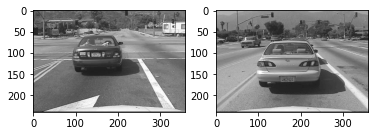

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()

ax[0].imshow(dataset[0], cmap = 'gray')
ax[1].imshow(dataset[300], cmap = 'gray')

In [12]:
dataset

array([[[0.3720729 , 0.3132494 , 0.22248784, ..., 0.45388314,
         0.4578047 , 0.46172625],
        [0.42248785, 0.34797803, 0.23817413, ..., 0.4695694 ,
         0.4695694 , 0.47349098],
        [0.3518996 , 0.32388315, 0.2768243 , ..., 0.45388314,
         0.45388314, 0.44996154],
        ...,
        [0.4350263 , 0.38796744, 0.38796744, ..., 0.873447  ,
         0.8538392 , 0.81462353],
        [0.47816354, 0.446791  , 0.4350263 , ..., 0.86168236,
         0.86168236, 0.84991765],
        [0.07424196, 0.0820851 , 0.07816353, ..., 0.09305491,
         0.07344706, 0.04991765]],

       [[0.3146412 , 0.46758237, 0.45581764, ..., 0.48358902,
         0.4992753 , 0.51104003],
        [0.27934706, 0.3146412 , 0.36954314, ..., 0.48751056,
         0.49535373, 0.4992753 ],
        [0.30679804, 0.22052352, 0.30679804, ..., 0.48751056,
         0.48751056, 0.49143216],
        ...,
        [0.45154586, 0.45546743, 0.4633106 , ..., 0.9440353 ,
         0.94011366, 0.91266274],
        [0.4

In [18]:
x_train = skimage.filters.gaussian(dataset, sigma = 10, truncate = 1/100)

'ax[0].set_xlim(0, width)\nax[0].set_ylim(height, 0)\nax[1].set_xlim(0, width)\nax[1].set_ylim(height, 0)'

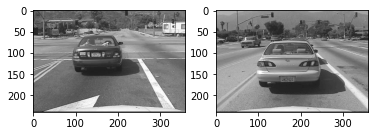

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()

ax[0].imshow(x_train[0], cmap = 'gray')
ax[1].imshow(x_train[300], cmap = 'gray')

"""ax[0].set_xlim(0, width)
ax[0].set_ylim(height, 0)
ax[1].set_xlim(0, width)
ax[1].set_ylim(height, 0)"""

In [20]:
#x_train

In [21]:
x_train1 = []
for img in x_train:
    x_train1.append(skimage.filters.laplace(img, ksize=5))

#Laplace filter does not work directly for all images
#x_train = skimage.filters.laplace(x_train, ksize = 5)

In [22]:
x_train = np.asarray(x_train1, dtype= np.float32)

'ax[0].set_xlim(0, width)\nax[0].set_ylim(height, 0)\nax[1].set_xlim(0, width)\nax[1].set_ylim(height, 0)'

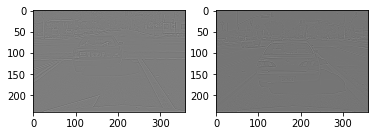

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()

ax[0].imshow(x_train[0], cmap = 'gray')
ax[1].imshow(x_train[300], cmap = 'gray')

"""ax[0].set_xlim(0, width)
ax[0].set_ylim(height, 0)
ax[1].set_xlim(0, width)
ax[1].set_ylim(height, 0)"""

In [24]:
x_train = tf.convert_to_tensor(x_train,dtype=tf.float32)

In [25]:
x_train.shape

TensorShape([400, 240, 360])

In [26]:
y = tf.ones((x_train.shape[0],1))

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0


In [27]:
y.shape

TensorShape([400, 1])

In [28]:
model=Sequential()

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer='Adam',metrics=[tf.keras.metrics.Accuracy()] ,loss='binary_crossentropy')
#metrics=[tf.keras.metrics.Accuracy()]

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [29]:
model.build(input_shape= x_train.shape)

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Reshape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [30]:
x_train.shape

TensorShape([400, 240, 360])

In [32]:
model.fit(x_train,y,epochs=32,steps_per_epoch=1)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Train on 400 samples
Epoch 1/32
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
400/400 [==============================] - 0s 501us/sample - loss: 6.7533e-11 - accuracy: 1.0000
Epoch 2/32
400/400 [==============================]

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  11059328  
_________________________________________________________________
dense_1 (Dense)              multiple                  129       
Total params: 11,059,457
Trainable params: 11,059,457
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.evaluate(x_train, y)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_1714 in device /job:localhost/replica:0/task:0

[6.752928870055261e-11, 1.0]

In [34]:
#read all images
testdata = skimio.imread_collection(car_test_dir)

#make ndarray
testdata = skimio.collection.concatenate_images(testdata)

#change dtype to float32
testdata = np.float32(testdata)

#Grayscale
testdata = skimage.color.rgb2gray(testdata)

testdata = skimage.filters.gaussian(testdata, sigma = 10, truncate = 1/100)



In [35]:
x_test1 = []
for img in testdata:
    x_test1.append(skimage.filters.laplace(img, ksize=5))
    
testdata = np.asarray(x_test1, dtype= np.float32)

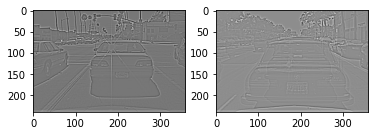

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()

ax[0].imshow(testdata[0], cmap = 'gray')
ax[1].imshow(testdata[30], cmap = 'gray')

In [38]:
testdata = tf.convert_to_tensor(testdata,dtype=tf.float32)

In [39]:
testdata.shape

TensorShape([126, 240, 360])

In [40]:
model.predict(testdata,steps=1)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_1579 in device /job:localhost/replica:0/task:0

array([[1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.6585351e-01],
       [9.4346523e-36],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [2.0042962e-31],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.000000

In [41]:
model.metrics_names

['loss', 'accuracy']

In [42]:
model.evaluate(testdata)

AttributeError: 'Sequential' object has no attribute 'accuracy'

In [58]:
testimg = skimio.imread('../LPR/dataset/img1.jpg')

#make ndarray
#testdata = skimio.collection.concatenate_images(testdata)

#change dtype to float32
testimg = np.float32(testimg)

#Grayscale
testimg = skimage.color.rgb2gray(testimg)

testimg = skimage.filters.gaussian(testimg, sigma = 10, truncate = 1/100)
    
testimg = skimage.filters.laplace(testimg, ksize=5)

In [59]:
testimg.shape

(240, 426)

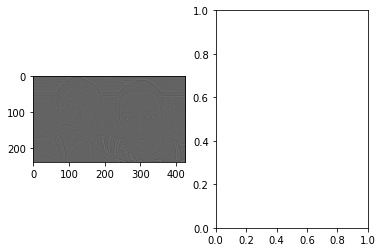

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()

ax[0].imshow(testimg, cmap = 'gray')
#ax[1].imshow(testimg[30], cmap = 'gray')

In [61]:
testimg = tf.convert_to_tensor(testimg,dtype=tf.float32)

In [63]:
model.evaluate(testimg)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
 32/240 [===>..........................] - ETA: 0s

ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 86400 but received input with shape [None, 426]